# 0. Set up
## Downloading Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Retrieving Data

We used the NYPD Complaint Data Historic dataset to analyze crimes that occured on Christmas over a 10 year period from 2008 to 2017. 


In [2]:
christmas = pd.read_csv('/Users/an-yuseon/Desktop/10yearChristmas.csv')

In [3]:
christmas.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,239663726,12/25/2012,00:01:00,NaN,NaN,106.0,05/11/2013,355,OFFENSES AGAINST THE PERSON,191.0,...,F,NaN,40.674518,-73.854313,"(40.67451772, -73.854313096)",PATROL BORO QUEENS SOUTH,NaN,25-44,UNKNOWN,M
1,897925936,12/25/2011,18:57:00,12/25/2011,18:58:00,77.0,05/10/2013,121,CRIMINAL MISCHIEF & RELATED OF,273.0,...,NaN,32.0,40.668806,-73.931122,"(40.668806093, -73.931121567)",PATROL BORO BKLYN NORTH,UTICA AVE.-CROWN HEIGHTS,NaN,UNKNOWN,E
2,820246456,12/25/2012,01:00:00,12/25/2012,01:05:00,9.0,04/22/2013,578,HARRASSMENT 2,638.0,...,M,NaN,40.728316,-73.983333,"(40.728315591, -73.983332556)",PATROL BORO MAN SOUTH,NaN,45-64,ASIAN / PACIFIC ISLANDER,F
3,905670415,12/25/2012,08:00:00,03/06/2013,08:00:00,34.0,04/18/2013,109,GRAND LARCENY,447.0,...,U,NaN,40.856400,-73.930107,"(40.856400421, -73.930106712)",PATROL BORO MAN NORTH,NaN,25-44,BLACK HISPANIC,M
4,395514344,12/25/2012,08:00:00,03/22/2013,08:00:00,104.0,04/17/2013,109,GRAND LARCENY,422.0,...,NaN,NaN,40.717340,-73.887411,"(40.717340352, -73.887411135)",PATROL BORO QUEENS NORTH,NaN,65+,WHITE,F


In [4]:
christmas.shape

(8464, 35)

## Cleaning& Formatting DataFrame

### Select needed columns
Since I am going to analyze the suspects' race and age per borough, I will select only columns that are needed.

In [5]:
xmas = christmas[['BORO_NM', 'SUSP_RACE','SUSP_AGE_GROUP']]

### Change column names.
I shortened column names for efficient programming. 

In [6]:
xmas.columns = ['boro', 'race', 'age']
xmas.head()

,boro,race,age
0,QUEENS,WHITE HISPANIC,25-44
1,BROOKLYN,NaN,NaN
2,MANHATTAN,WHITE,45-64
3,MANHATTAN,UNKNOWN,NaN
4,QUEENS,NaN,NaN


### Remove NAs and Unknowns
Since some values are "unknown" or "nan", I removed those values.

In [7]:
xmas = xmas[xmas!='UNKNOWN'].dropna()
xmas.head()

,boro,race,age
0,QUEENS,WHITE HISPANIC,25-44
2,MANHATTAN,WHITE,45-64
6,BROOKLYN,WHITE HISPANIC,45-64
10,QUEENS,WHITE HISPANIC,18-24
15,STATEN ISLAND,WHITE HISPANIC,25-44


# 1. Christmas Crime Prevalence per Borough 

I counted how many crimes occured on Christmas in each borough. 

In [8]:
xmas['boro'].value_counts()

BROOKLYN         753
BRONX            656
QUEENS           553
MANHATTAN        406
STATEN ISLAND    178
Name: boro, dtype: int64

Text(0.5,1,'# of crimes per borough')

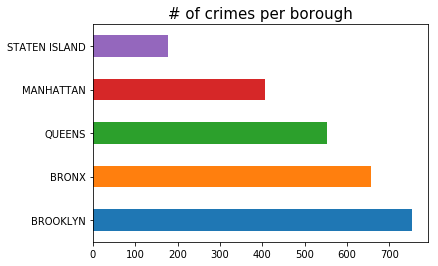

In [9]:
fig, ax0 = plt.subplots() 
plt.rc('axes', titlesize=15)
xmas['boro'].value_counts().plot(ax=ax0, kind='barh')
ax0.set_title('# of crimes per borough')

Brooklyn's number of crimes occured during Christmas day was the highest, followed by the Bronx, Queens, Manhattan, with Staten Island having the lowest. 

The boroughs with the highest and the lowest reported crimes was in line with the overall dataset of reported crimes over the 10 year period, but other boroughs varied in order from the overall dataset. According to NYPD's statistics from 2009 to 2017, the order from most to least reported crimes by borough was Brooklyn-Manhattan-Queens-Bronx-Staten Island. 

https://projects.newsday.com/databases/long-island/new-york-city-crime-rate/

Based on the data, when compared to Queens and the Bronx, Manhattan has a lower crime rate on Christmas than typically reported over the period under analysis. A possible explanation for this are the additional foot patrol officers in Manhattan to protect the increase in tourists in Manhattan on Christmas. According to "Broken Windows", 1982, by James Wilson, the presence of additional foot-patrol officers elevate the level of public order. Wilson explains that disorder and crime are usually inextricably linked. In his thesis, Wilson notes that social psychologists and police officers tend to agree that if a window in a building is broken and is left unrepaired, the remaining windows will soon be broken creating an area in disorder. 
When applied to criminal activity, an area in disorder is more vulnerable to criminal invasion.  Therefore, an area with increased patrol officers will be less susceptible to disorder and, consequently, less criminal activity.


### Adding US Census statistics

To determine whether the criminal activity was directly related to the population changes of each borough, I considered the population differences between the boroughs. 

I used New York City Boroughs Population data from **US CENSUS Bureau**. Since the percentage of population increase in each borough was similar, I used 2010 data in my analysis. 

https://www.citypopulation.de/php/usa-newyorkcity.php

In [10]:
pop = pd.read_csv('/Users/an-yuseon/Desktop/pop_borough.csv')
pop.head()

,Borough,Population(2010-04-01)
0,BRONX,1384794
1,BROOKLYN,2504706
2,MANHATTAN,1586184
3,QUEENS,2230545
4,STATEN ISLAND,468730


### Merge DataFrames

To merge this dataframe with the result of xmas['boro'].value_counts() which is series, I changed the series into dataframe and named columns. 

In [11]:
boroN = pd.DataFrame(xmas['boro'].value_counts().reset_index())
boroN.columns = ['Borough', 'Number of Crimes']
print(boroN)
type(boroN)

         Borough  Number of Crimes
0       BROOKLYN               753
1          BRONX               656
2         QUEENS               553
3      MANHATTAN               406
4  STATEN ISLAND               178


pandas.core.frame.DataFrame

In [12]:
pop_merged = pd.merge(boroN, pop, on='Borough')
pop_merged = pop_merged.set_index('Borough')
pop_merged

,Number of Crimes,Population(2010-04-01)
Borough,,
BROOKLYN,753,2504706
BRONX,656,1384794
QUEENS,553,2230545
MANHATTAN,406,1586184
STATEN ISLAND,178,468730


### Create A New Column

I created a new column which shows (number of crimes * 100) / population per borough.


In [13]:
pop_merged['(# of crimes * 100) / # of pop'] = pop_merged['Number of Crimes']*100/pop_merged['Population(2010-04-01)']
pop_merged

,Number of Crimes,Population(2010-04-01),(# of crimes * 100) / # of pop
Borough,,,
BROOKLYN,753,2504706,0.030063
BRONX,656,1384794,0.047372
QUEENS,553,2230545,0.024792
MANHATTAN,406,1586184,0.025596
STATEN ISLAND,178,468730,0.037975


Text(0.5,1,'( Number of crimes * 100) / Number of population')

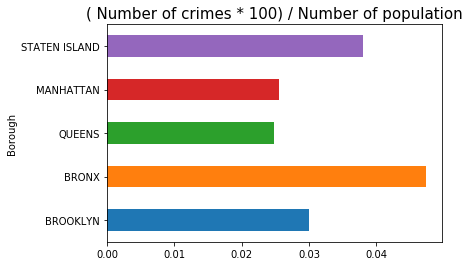

In [14]:
fig, ax1 = plt.subplots() 
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=13)
pop_merged['(# of crimes * 100) / # of pop'].plot(ax=ax1, kind='barh')
ax1.set_title('( Number of crimes * 100) / Number of population')

### Result

Considering each borough's population, on Christmas day, the Bronx has the highest crime rate and Queens has the lowest rate.
Staten Island has a high crime rate due to the comparatively less number of police and a bigger area to patrol. 


# 2. Suspects' Race Distribution per Borough

### Formatting DataFrame

I set borough as the index.

In [15]:
xmas_b = xmas.set_index('boro')
xmas_b.head()

,race,age
boro,,
QUEENS,WHITE HISPANIC,25-44
MANHATTAN,WHITE,45-64
BROOKLYN,WHITE HISPANIC,45-64
QUEENS,WHITE HISPANIC,18-24
STATEN ISLAND,WHITE HISPANIC,25-44


I will sort the dataframe by boroughs. 

In [16]:
queens = xmas_b.loc['QUEENS',:]
manhattan = xmas_b.loc['MANHATTAN',:]
brooklyn = xmas_b.loc['BROOKLYN',:]
bronx = xmas_b.loc['BRONX',:]
staten = xmas_b.loc['STATEN ISLAND',:]

### Analyzing Race distribution

In [17]:
QRR = queens['race'].value_counts()
MHR = manhattan['race'].value_counts()
BKR = brooklyn['race'].value_counts()
BXR = bronx['race'].value_counts()
STR = staten['race'].value_counts()

Text(0.5,1,"SUSPECTS' RACE DISTRIBUTION : STATEN ISLAND")

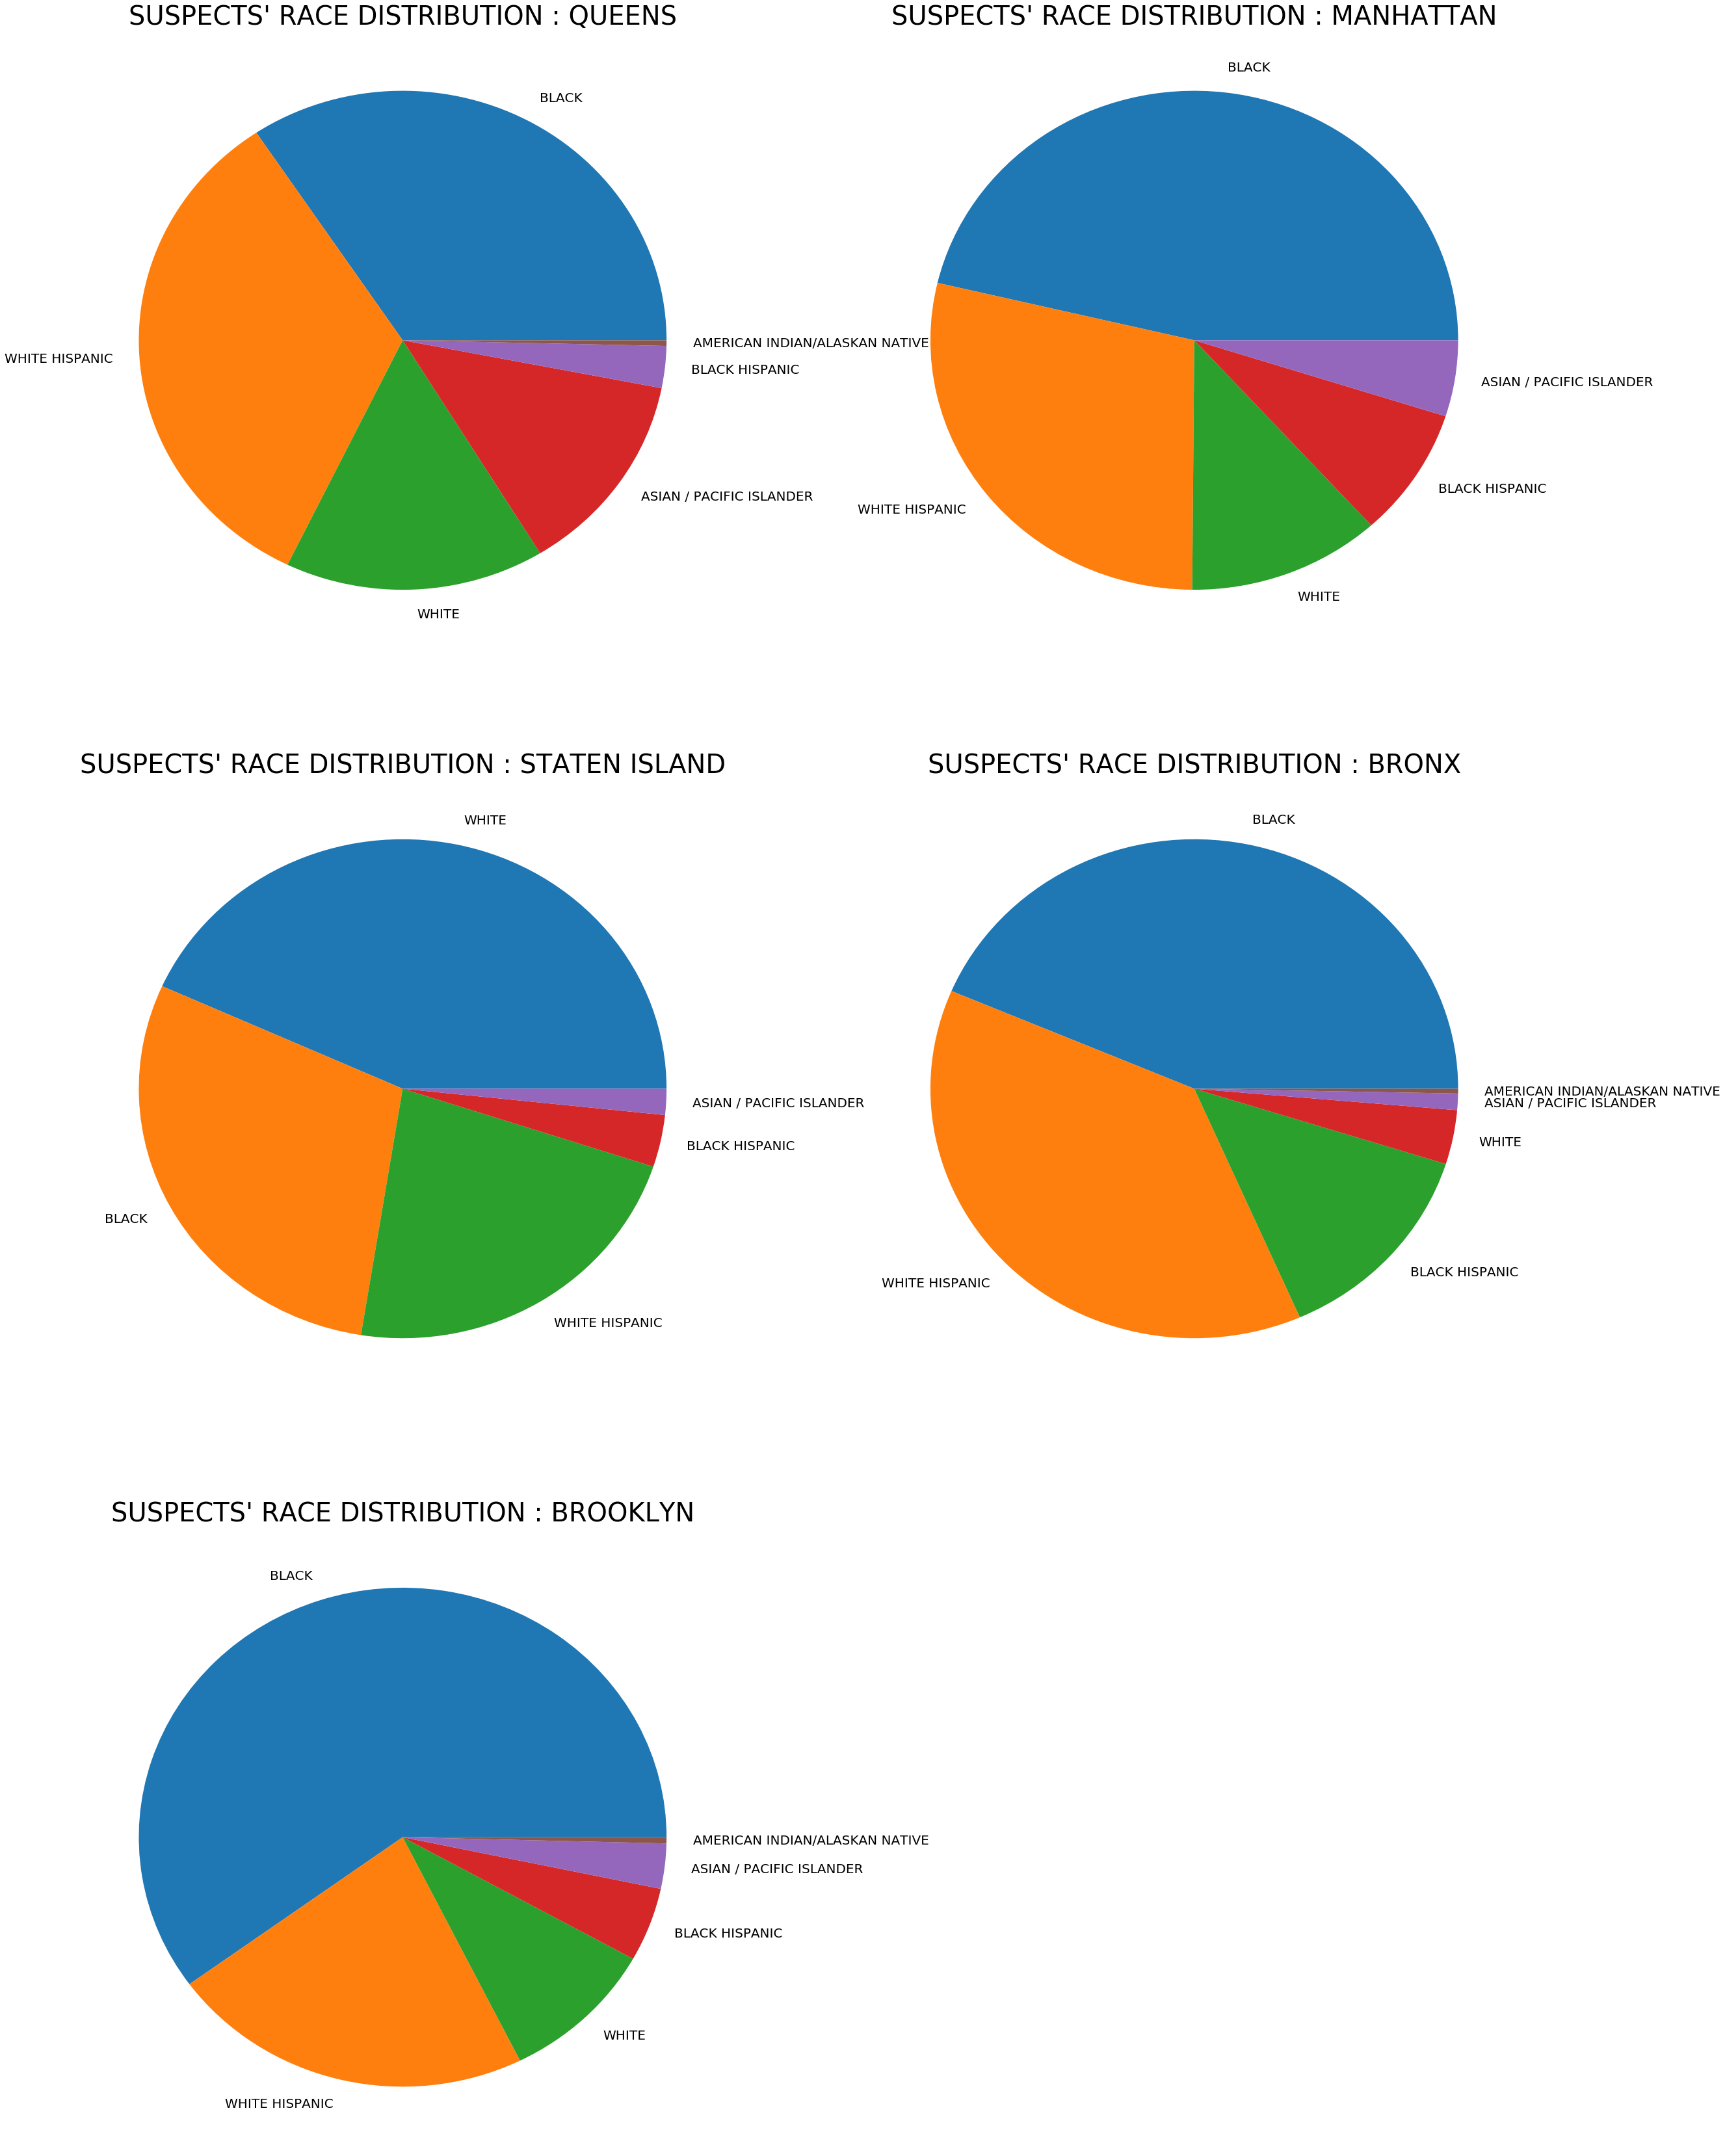

In [18]:
fig  = plt.figure(figsize=(40,60))
plt.rc('font', size=20)
plt.rc('axes', titlesize=40)

ax1 = plt.subplot2grid((3,2),(0,0))
QRR.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' RACE DISTRIBUTION : QUEENS")

ax1 = plt.subplot2grid((3,2), (0, 1))
MHR.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' RACE DISTRIBUTION : MANHATTAN")

ax1 = plt.subplot2grid((3,2), (2, 0))
BKR.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' RACE DISTRIBUTION : BROOKLYN")

ax1 = plt.subplot2grid((3,2), (1, 1))
BXR.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' RACE DISTRIBUTION : BRONX")

ax1 = plt.subplot2grid((3,2), (1, 0))
STR.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' RACE DISTRIBUTION : STATEN ISLAND")

### Result

Aside from Staten Island, in all other boroughs Blacks had the highest crime rate with White Hispanics following in second. In Staten Island, Whites had the highest crime most likely because Staten Island's racial distribution is concentrated on the White racial grouping.  According to Statsandthecity, the two largest racial groups in Staten Island are White (72.8%) and Black (10.6%), Queens are White (39.7%) and Black (19.1%), and Brooklyn are White (42.8%)  and Black (34.3%).


# 3. Suspects' Age Distribution per Borough

### Formatting DataFrame

In [19]:
QRA = queens['age'].value_counts()
MHA = manhattan['age'].value_counts()
BKA = brooklyn['age'][brooklyn['age']!='-948'].value_counts() # there is a error in the data set. 
BXA = bronx['age'].value_counts()
STA = staten['age'].value_counts()

Text(0.5,1,"SUSPECTS' AGE DISTRIBUTION : STATEN ISLAND")

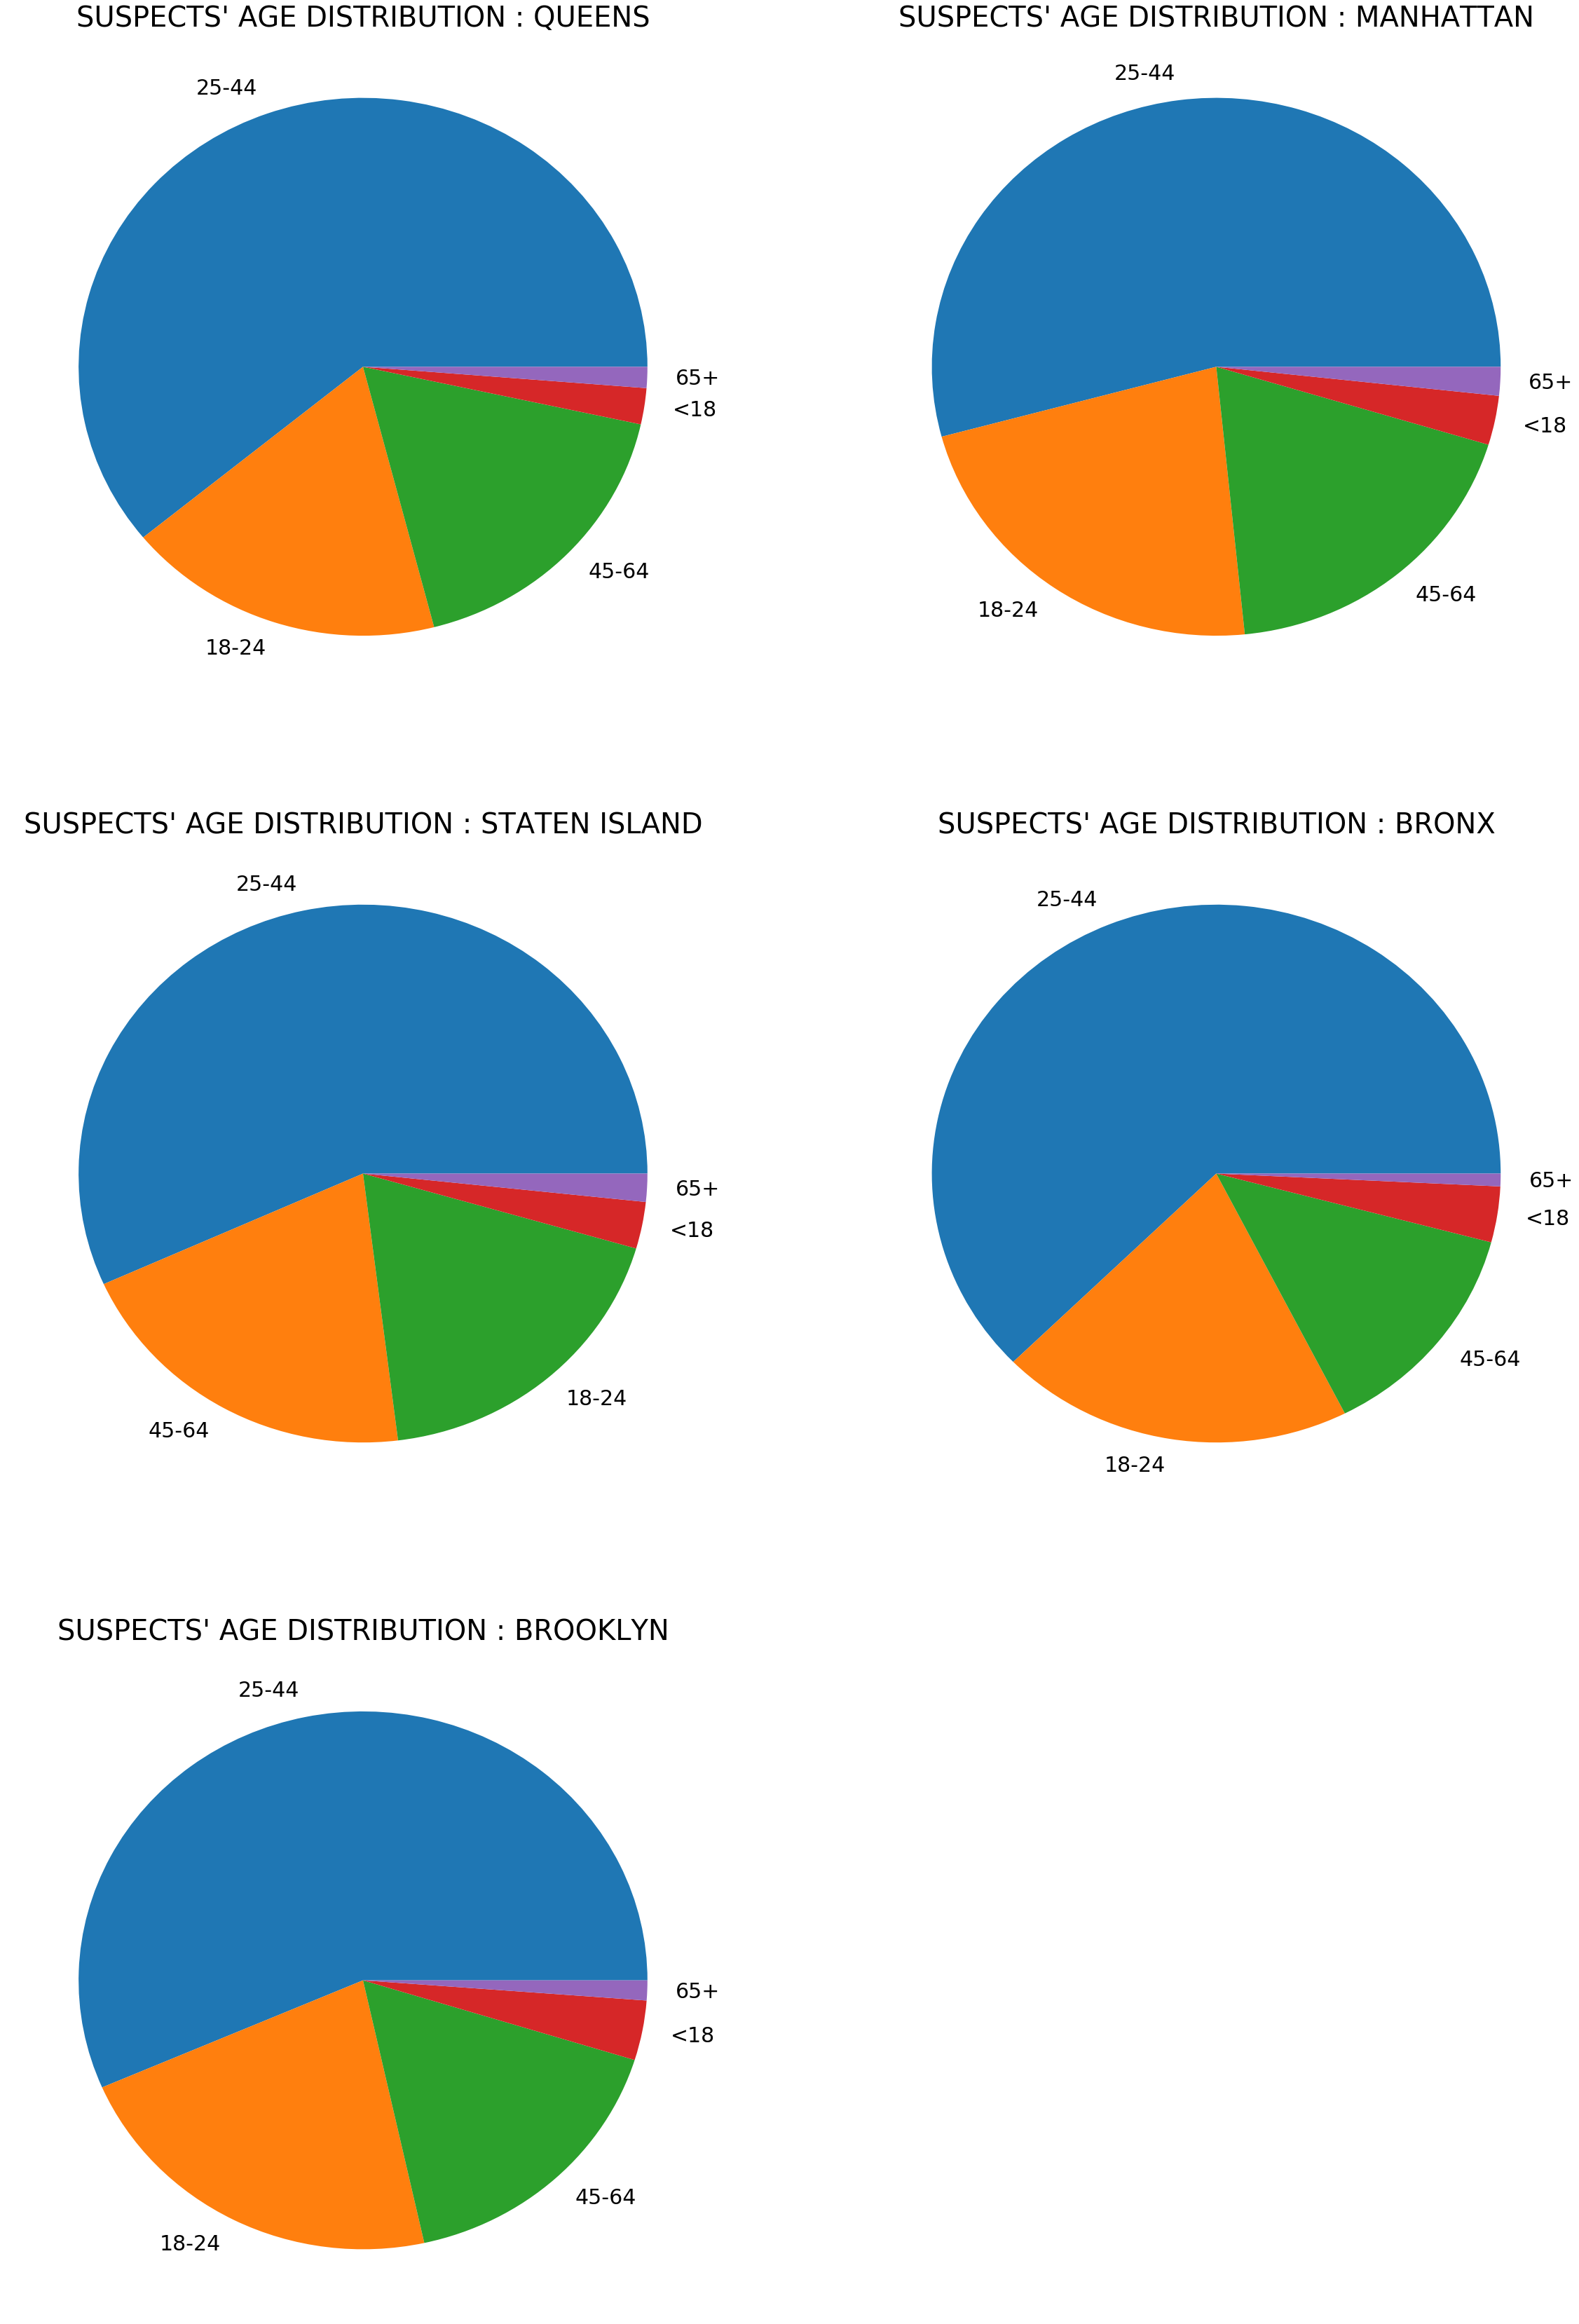

In [20]:
fig  = plt.figure(figsize=(40,60))
plt.rc('font', size=30)
plt.rc('axes', titlesize=40)

ax1 = plt.subplot2grid((3,2),(0,0))
QRA.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' AGE DISTRIBUTION : QUEENS")

ax1 = plt.subplot2grid((3,2), (0, 1))
MHA.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' AGE DISTRIBUTION : MANHATTAN")

ax1 = plt.subplot2grid((3,2), (2, 0))
BKA.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' AGE DISTRIBUTION : BROOKLYN")

ax1 = plt.subplot2grid((3,2), (1, 1))
BXA.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' AGE DISTRIBUTION : BRONX")

ax1 = plt.subplot2grid((3,2), (1, 0))
STA.plot(ax=ax1, kind='pie')
ax1.set_ylabel('')
ax1.set_title("SUSPECTS' AGE DISTRIBUTION : STATEN ISLAND")

### Result

In all boroughs, the age group which committed the most amount of criminal activity was the 25-44 year old bracket.  Aside from Staten Island, the age group with the second highest crime rate was the 18-24 year old grouping.  In Staten Island, the age group which committed the second highest crime rate was surprisingly the 45-64 year old bracket.  

# Reference

-	Wilson, James Q., and George L. Kelling. 1982. "Broken Windows.” The Atlantic Monthly, March. 


# Data Source
- https://projects.newsday.com/databases/long-island/new-york-city-crime-rate/
- https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i/data
- https://mycrains.crainsnewyork.com/stats-and-the-city/2011/demographics/racial-breakdown-by-borough